<h2>Helper Notebook for Creating Code Flow Data</h2>

In [3]:
# REYeker lib
import modules.rEYEkerAnalysis as rEYEker

# lib for dataframes
import pandas as pd

import numpy as np

# lib for plotting
from matplotlib import pyplot as plt

# lib for crerating paths
from pathlib import Path

import random

In [4]:
def draw_lines(sheet_config, width):
    height_of_line = sheet_config.loc[1]['stop'] - sheet_config.loc[1]['start']
    
    for idx, val in sheet_config.iterrows():
        #print(idx, val)
        plt.text(0, val['start']+height_of_line/2, str(idx))
        plt.plot([0, width], [val['start'], val['start']], color='grey')
        
def draw_heat(img, aoi_mask, aoi_colors):
    for height in range(img.shape[0]):
        for width in range(img.shape[1]):
            if aoi_mask[height, width] == 0:
                break
            img[height, width] = 0.4 * img[height, width] + 0.6 * aoi_colors[aoi_mask[height, width]]

In [5]:
def draw_heat_tmp(img, aoi_mask, aoi_colors, start, end):
    for height in range(img.shape[0]):
        for width in range(start, end):
            if aoi_mask[height, width] == 0:
                break
            img[height, width] = 0.4 * img[height, width] + 0.6 * aoi_colors[aoi_mask[height, width]]

<h3>Config</h3>

In [6]:
algo = "BinarySearchStrings"

image_path = 'images/Posttest/' + algo + '.png'

#path for line sheet
sheet_path = './data/code_flow/'+ algo + '.xlsx'

#name for excel file saved in ./data/code_flow folder
save_as = 'AOI_' + algo


(446, 528, 3)
214 228
229 243
244 258
259 273
274 288
289 303
304 318
319 333
334 348
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
528


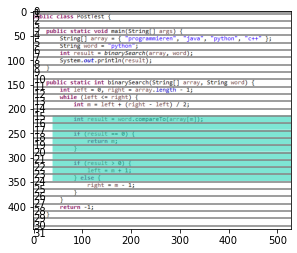

In [11]:
sheet_config = pd.read_excel(sheet_path, sheet_name="config")

img = rEYEker.load_image(image_path)
aoi_mask = np.zeros((img.shape[0], img.shape[1])).astype(int)
aoi_mask_syntax = np.zeros((img.shape[0], img.shape[1])).astype(int)

print(img.shape)
# commonChars: none, main, definition, pre calculation, if condition, if step,iteration condition, iteration step, return result

aoi_regions = [ #line, name
    (-1, "none"),

    (3, "main"),
    (4, "main"),
    (5, "main"),
    (6, "main"),
    (7, "main"),

    #(9, "definition"),
    #(10, "pre calculation"),

    #(12, "iteration condition"),
    #(13, "if condition"),
    #(14, "if step"),
    
    #(12, "syntax"),
    #(13, "syntax"),
    #(14, "syntax"),
    #(15, "syntax"),
    (15, "syntax"),
    (16, "syntax"),
    (17, "syntax"),
    (18, "syntax"),
    (19, "syntax"),
    (20, "syntax"),
    (21, "syntax"),
    (22, "syntax"),
    (23, "syntax"),
    
    #(18, "return result"),
]

aoi_names = list(dict.fromkeys([name for (line, name) in aoi_regions]))

for region in aoi_regions:
    if region[0] == -1:
        continue
    aoi_mask[sheet_config.loc[region[0]]['start']:sheet_config.loc[region[0]]['stop'], :] = aoi_names.index(region[1])
    

for region in aoi_regions:
    if region[0] == -1:
        continue
    if region[1] == 'syntax':
        aoi_mask_syntax[sheet_config.loc[region[0]]['start']:sheet_config.loc[region[0]]['stop'], :] = aoi_names.index(region[1])
        start = sheet_config.loc[region[0]]['start']
        end = sheet_config.loc[region[0]]['stop']
        print(start, end)
        #aoi_mask_syntax[start:end, :] = aoi_names.index(region[1])


print(aoi_mask_syntax)

aoi_colors = [np.array([1.0, 1.0, 1.0])]

for i in range(np.amax(aoi_mask)):
    aoi_colors.append(np.array([random.uniform(0,1), random.uniform(0,1), random.uniform(0,1)]))  

width = int(img.shape[1])
print(width)
draw_heat_tmp(img, aoi_mask_syntax, aoi_colors, 40, width)
#draw_heat_tmp(img, aoi_mask, aoi_colors, int(img.shape[1]*0.5))

draw_lines(sheet_config, img.shape[1])
#get_x_y(sheet_config, img.shape[1])

plt.imshow(img);

save Data to Excel

In [14]:
cols = ["startHeight", "stopHeight", "startWidth", "stopWidth", "Name"]
tmp_list = []
for region in aoi_regions:
    if region[0] == -1:
        continue
    tmp_list.append([sheet_config.loc[region[0]]['start'], sheet_config.loc[region[0]]['stop'],0, img.shape[1], region[1]])
    
df_config = pd.DataFrame(tmp_list, columns=cols)

folder = "./data/aoi_categorized/"
Path(folder).mkdir(parents=True, exist_ok=True)

writer = pd.ExcelWriter(folder + save_as + '.xlsx', engine='xlsxwriter')
df_config.to_excel(writer, index=False)

writer.save()